*This project is based on house price predictions using the XG Boost Machine Learning Model. This is a regression problem as I am trying to predict continuous values which in this case are the house prices of properties is Boston. The dataset used in this project is from the UCI machine learning repository, The data was collected in 1978. Below I have imported the libraries and the XGboost Machine Learning Model that I will be using for this project.*

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn.datasets 
from sklearn.model_selection import train_test_split 
from xgboost import XGBRegressor 
from sklearn import metrics 
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

print(boston)


{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

/Users/nikulkerai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

*As you can see below I have placed the Boston dataset which I have loaded into Python inside a pandas dataframe and then added the column names to help understand the dataset features for each house. After this I have incooperated the price column into the dataset also.*

In [4]:
Boston_House_Prices = pd.DataFrame(boston.data)

In [5]:
Boston_House_Prices.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
Boston_House_Prices = pd.DataFrame(boston.data, columns = boston.feature_names)

In [7]:
Boston_House_Prices.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
Boston_House_Prices['price'] = boston.target

In [9]:
Boston_House_Prices.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
Boston_House_Prices.shape

(506, 14)

*Above after producing the desired dataframe structure, I am checking how many rows and columns the dataframe has 506 rows and 14 columns in total. The next below I am checking the data for any missing values using the isnull function. As you can see below there is no missing values in the dataset.*

In [11]:
Boston_House_Prices.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [12]:
Boston_House_Prices.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


*To understand the correlation between all the 13 attributes in the dataset I have plotted a heatmap using the matplotlib library. The cbar represents the colour bar on the right of the heatmap. A positive value on the cbar means that a particular attribute is positively correlated and a negative value on the cbar means that a particular attribute is negatively correlated. fmt is 1f to represent all the values to 1 decimal place. Annot is to show the feature names on the heatmap and annot_kws represents the size of the heatmap which in this case is size 8.*

In [13]:
correlation = Boston_House_Prices.corr()

<AxesSubplot:>

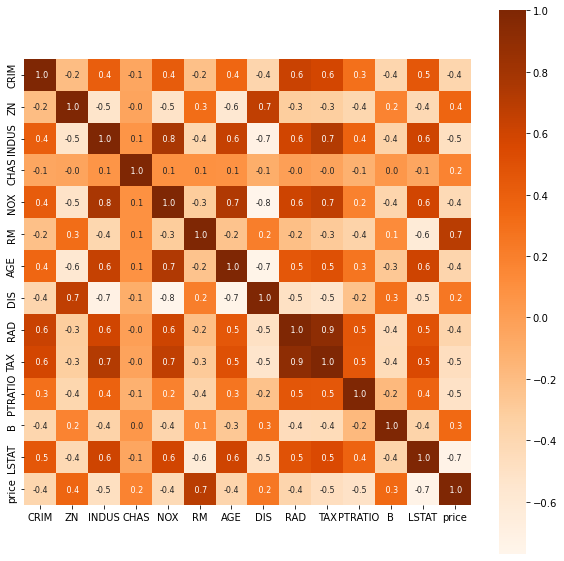

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = ' .1f', annot=True, annot_kws={'size':8}, cmap='Oranges')

*The next step is to now split the data and the price by creating two variables which are X and Y below. X includes all the data and Y  includes all the prices as shown below.*

In [15]:
X = Boston_House_Prices.drop(['price'], axis=1)
Y = Boston_House_Prices['price']

In [16]:
print(X)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [17]:
print(Y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64


*Below I have taken the steps to split the data into the training and testing sets which will be used on the XGBoost Machine Learning Model. 80% of the data is stored as training data and 20% of the data is stored as test data.*

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 2)

In [19]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


*The next step below is to load the XGBoost Regressor Machine Learning Model and run the training data against the model as shown below. Once the data has successfully been loaded into the model, I have then done the evaluation step which determines how well the model is evaluating the dataset. I have calculated the R squared error and Mean Absolute error for the training set of data and the test set of data.The lower the values calculated the more accurate the model is and the value should ideally be closer to 0 to get closer to perfect accuracy.*

In [20]:
model = XGBRegressor()

In [21]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [22]:
train_prices_prediction = model.predict(X_train)

In [23]:
print(train_prices_prediction)

[23.147501  20.99463   20.090284  34.69053   13.903663  13.510157
 21.998634  15.1940975 10.899711  22.709627  13.832816   5.592794
 29.810236  49.99096   34.89215   20.607384  23.351097  19.23555
 32.695698  19.641418  26.991022   8.401829  46.00729   21.708961
 27.062933  19.321356  19.288303  24.809872  22.61626   31.70493
 18.542515   8.697379  17.395294  23.700663  13.304856  10.492197
 12.688369  25.016556  19.67495   14.902088  24.193798  25.007143
 14.900281  16.995798  15.6009035 12.699232  24.51537   14.999952
 50.00104   17.525454  21.184624  31.998049  15.613355  22.89754
 19.325378  18.717896  23.301125  37.222923  30.09486   33.102703
 21.00072   49.999332  13.405827   5.0280113 16.492886   8.405072
 28.64328   19.499939  20.586452  45.402164  39.79833   33.407326
 19.83506   33.406372  25.271482  50.001534  12.521657  17.457413
 18.61758   22.602625  50.002117  23.801117  23.317268  23.087355
 41.700035  16.119293  31.620516  36.069206   7.0022025 20.3827
 19.996452  11.

In [24]:
score_1 = metrics.r2_score(Y_train, train_prices_prediction)

score_2 = metrics.mean_absolute_error(Y_train, train_prices_prediction)

print("R squared Error: ", score_1)
      
print('Mean Absolute Error', score_2)

R squared Error:  0.9999948236320982
Mean Absolute Error 0.0145848437110976


*As you can see above the value for the R squared Error is 0.99 and the value for the Mean Absolute Error is 0.0145. Both values are very close to 0 and this shows that the model is predicting the house prices very accurately for the training data.*

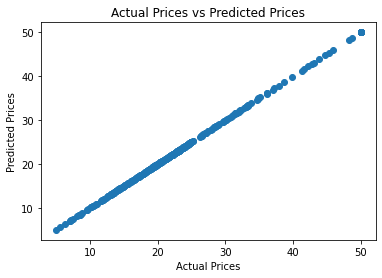

In [25]:
plt.scatter(Y_train, train_prices_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

*Above I have plotted a graph which visualises the Actual House Prices against the Predicted House Prices. As you can see from the graph above all the data points are very close to each other which means that the value predicted by the XGBoost Regressor Model on the Y axis is quite similar to the actual house prices from the original dataset.*

In [26]:
test_prices_prediction = model.predict(X_test)

In [27]:
print(test_prices_prediction)

[20.288406  20.60247   30.9758    29.910797   8.624953  14.235525
 23.523052  29.730324  31.97293   22.015892  27.946804  24.034412
 20.771402  21.849985  12.024127  22.074675  18.487509  11.052485
  8.141267  15.730722  23.163914  20.233883  35.700928  19.041637
 15.129744  20.228016  47.067314  30.426474  32.729023  17.345776
 17.889462  19.40687   30.769133  25.431686  12.05332   17.900238
 11.031679  21.109531  20.64321   21.982754  25.016281  12.648555
 31.042107   7.106914  18.685764  14.380013  34.902393  16.130005
 32.98537   10.950912  27.335018  29.399937   7.0065055 35.398712
 22.978228  18.582758  19.224293  20.003431  15.341814  22.38517
 19.077105  21.955967  18.91404   32.77595   32.76772   24.36317
 48.262913  23.385014  10.551914  22.664684  14.671612   8.881822
 16.700302  17.221045  26.204681  26.826794  21.590458  21.61216
 19.662537  23.533224  33.25156   17.105299  19.517323  29.344427
 48.885273  35.723255  18.257914  24.461905  27.235567  21.319864
 21.661198  2

In [28]:
score_1 = metrics.r2_score(Y_test, test_prices_prediction)

score_2 = metrics.mean_absolute_error(Y_test, test_prices_prediction)

print("R squared error: ", score_1)
      
print('Mean Absolute Error', score_2)

R squared error:  0.8711660369151691
Mean Absolute Error 2.2834744154238233


*As you can see above the value for the R squared Error is 0.87 and the value for the Mean Absolute Error is 2.283. Both values are very close to 0 and this shows that the model is predicting the house prices very accurately for the test data aswell.*